Visualization of MNIST Convolutional Neural Network

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import callbacks

In [66]:
plt.style.use('dark_background')

Function to draw and save

In [67]:
def predict_save(idx, model, filename=None):
    layer_activations = [layer.output for layer in model.layers]
    model_activations = models.Model(inputs=model.input, outputs=layer_activations)
    activations = model_activations.predict(X_test[idx].reshape((1, 28, 28, 1)))
    print("AI Predict : ", np.argmax(activations[-1]))
    fig = plt.figure(figsize=(10, 10))
    cmap = "coolwarm"
    last_height = 0
    for layer_num, layer in enumerate(layer_activations):
        if layer.shape.rank == 2 and layer.shape[1] < 512: # Dense layers
            width, height = 7.2, 0.034
            x0, y0 = (10 - width)/2, -height - last_height
            ax = fig.add_axes([x0, y0, width, height])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.imshow([activations[layer_num][0,:]], cmap=cmap)
        elif layer.shape.rank == 4: # Convolutional layers
            for i in range(layer.shape[-1]):
                if layer.shape[3] >= 12:
                    width, height = 0.095, 0.095
                else:
                    width, height = 0.2, 0.2
                x0 = i * (width + 0.01) + (10 - layer[1].shape[2] * (width + 0.01)) / 2
                y0 = - height - last_height

                ax = fig.add_axes([x0, y0, width, height])
                ax.set_yticks([])
                ax.set_xticks([])
                ax.imshow(activations[layer_num][0,:,:,i], cmap=cmap)
        else:
            height = -0.01

        fig.text(5, - last_height + 0.03, layer_names[layer_num], fontdict={"size":16}, horizontalalignment='center', verticalalignment='center')
        last_height += 0.06 + height

    if not filename:
        plt.show()
    else:
        fig.savefig(filename, bbox_inches="tight")
    plt.clf()
    plt.close()

Loading and preprocessing MNIST data

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((-1, 28, 28, 1)) / 255
X_test = X_test.reshape((-1, 28, 28, 1)) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

C:\Users\kimis\AppData\Local\Temp\ipykernel_6284\3818962311.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


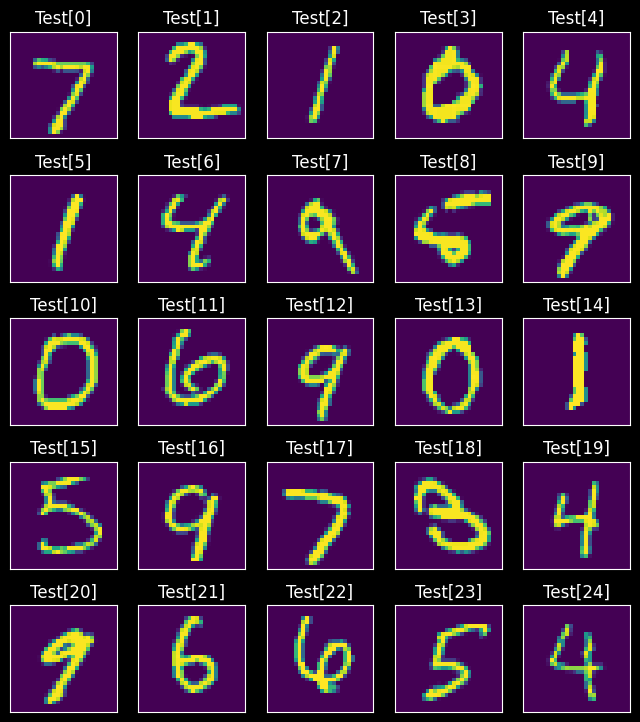

In [69]:
plt.subplots(figsize=(8,9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape((28, 28)))
    plt.title("Test[" + str(i) + "]")

Convolutional neural network (1)

Note that the hyperparameters of this network was selected in a such way that the visualizations look nice.

In [70]:
model0 = models.Sequential()
model0.add(layers.Lambda(lambda x: x, input_shape=(28, 28, 1), name="Input"))
model0.add(layers.Conv2D(6, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(12, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(12, (3, 3), padding="same"))
model0.add(layers.ReLU())
model0.add(layers.Flatten())
model0.add(layers.Dense(36))
model0.add(layers.ReLU())
model0.add(layers.Dense(18))
model0.add(layers.ReLU())
model0.add(layers.Dense(10))
model0.add(layers.Softmax())

layer_names = ["Input", 
               "Convolutional #1", "ReLU", "Max Pooling", 
               "Convolutional #2", "ReLU", "Max Pooling",
               "Convolutional #3", "ReLU", "----- Flattening -----",
               "Dense #1", "ReLU",
               "Dense #2", "ReLU",
               "Dense #3", "Softmax"]

In [71]:
model0.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model0.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test), batch_size=64,
                     verbose=0)

1/1 [==============================] - 0s 62ms/step
activation[-1] :  [[5.79344987e-06 2.69285393e-11 9.40259781e-09 1.20088174e-07
  5.62006575e-09 1.03722186e-07 9.99976039e-01 2.08633683e-11
  1.79509916e-05 2.54186755e-10]]
activation[-1] max :  6


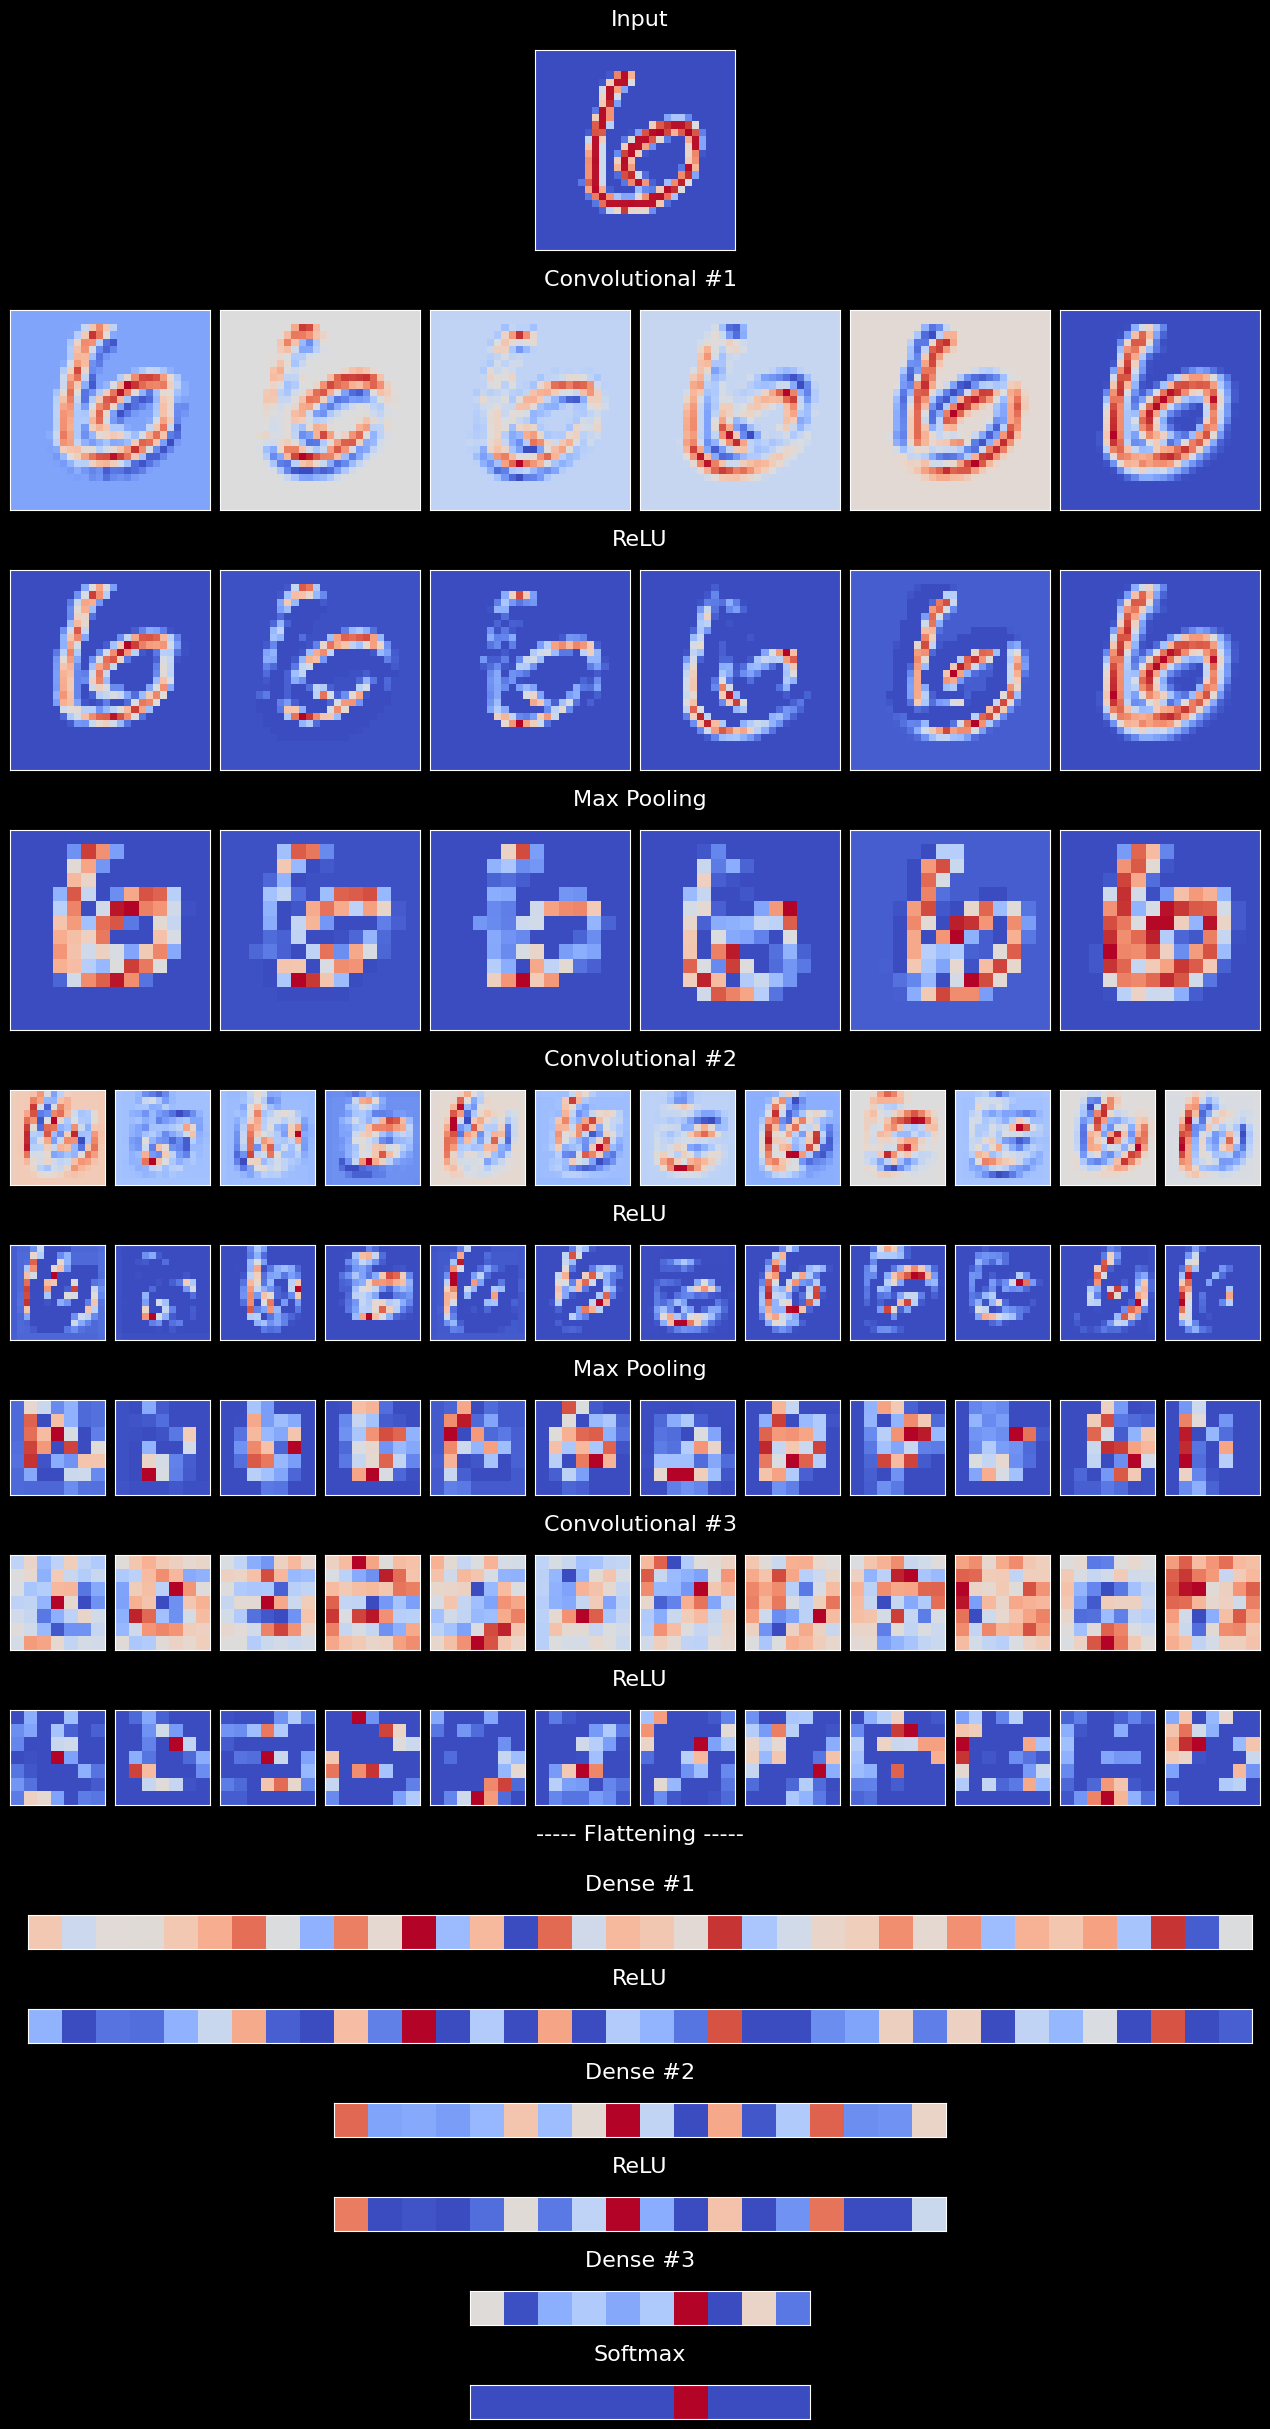

In [72]:
predict_save(11, model0)

Convolutional neural network (2)

Note that the hyperparameters of this network was selected in a such way that the visualizations look nice.

In [73]:
model1 = models.Sequential()
model1.add(layers.Lambda(lambda x: x, input_shape=(28, 28, 1), name="Input"))
model1.add(layers.Conv2D(10, (3, 3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(20, (3, 3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(20, (3, 3), padding="same", activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.Dense(60, activation="relu"))
model1.add(layers.Dense(10, activation="softmax"))

layer_names = ["Input", 
               "Convolutional #1", "Max Pooling", 
               "Convolutional #2", "Max Pooling",
               "Convolutional #3", "----- Flattening -----",
               "Dense #1", "Dense #2"]

In [74]:
class VisualizationLogger(callbacks.Callback):
    def set_model(self, model):
        self.model = model
        self.cnt = 0

    def on_batch_begin(self, epoch, logs=None):
        self.cnt += 1
        predict_save(8, self.model, "output/" + str(self.cnt) + ".png")

callbacks = []
        
model1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model1.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test), batch_size=64, callbacks=callbacks, verbose=0)

1/1 [==============================] - 0s 52ms/step
activation[-1] :  [[5.3778624e-08 1.5430734e-09 3.1875452e-10 4.3824468e-09 5.5118380e-07
  8.9727694e-01 1.0046988e-01 8.4739167e-09 2.1777570e-03 7.4805605e-05]]
activation[-1] max :  5


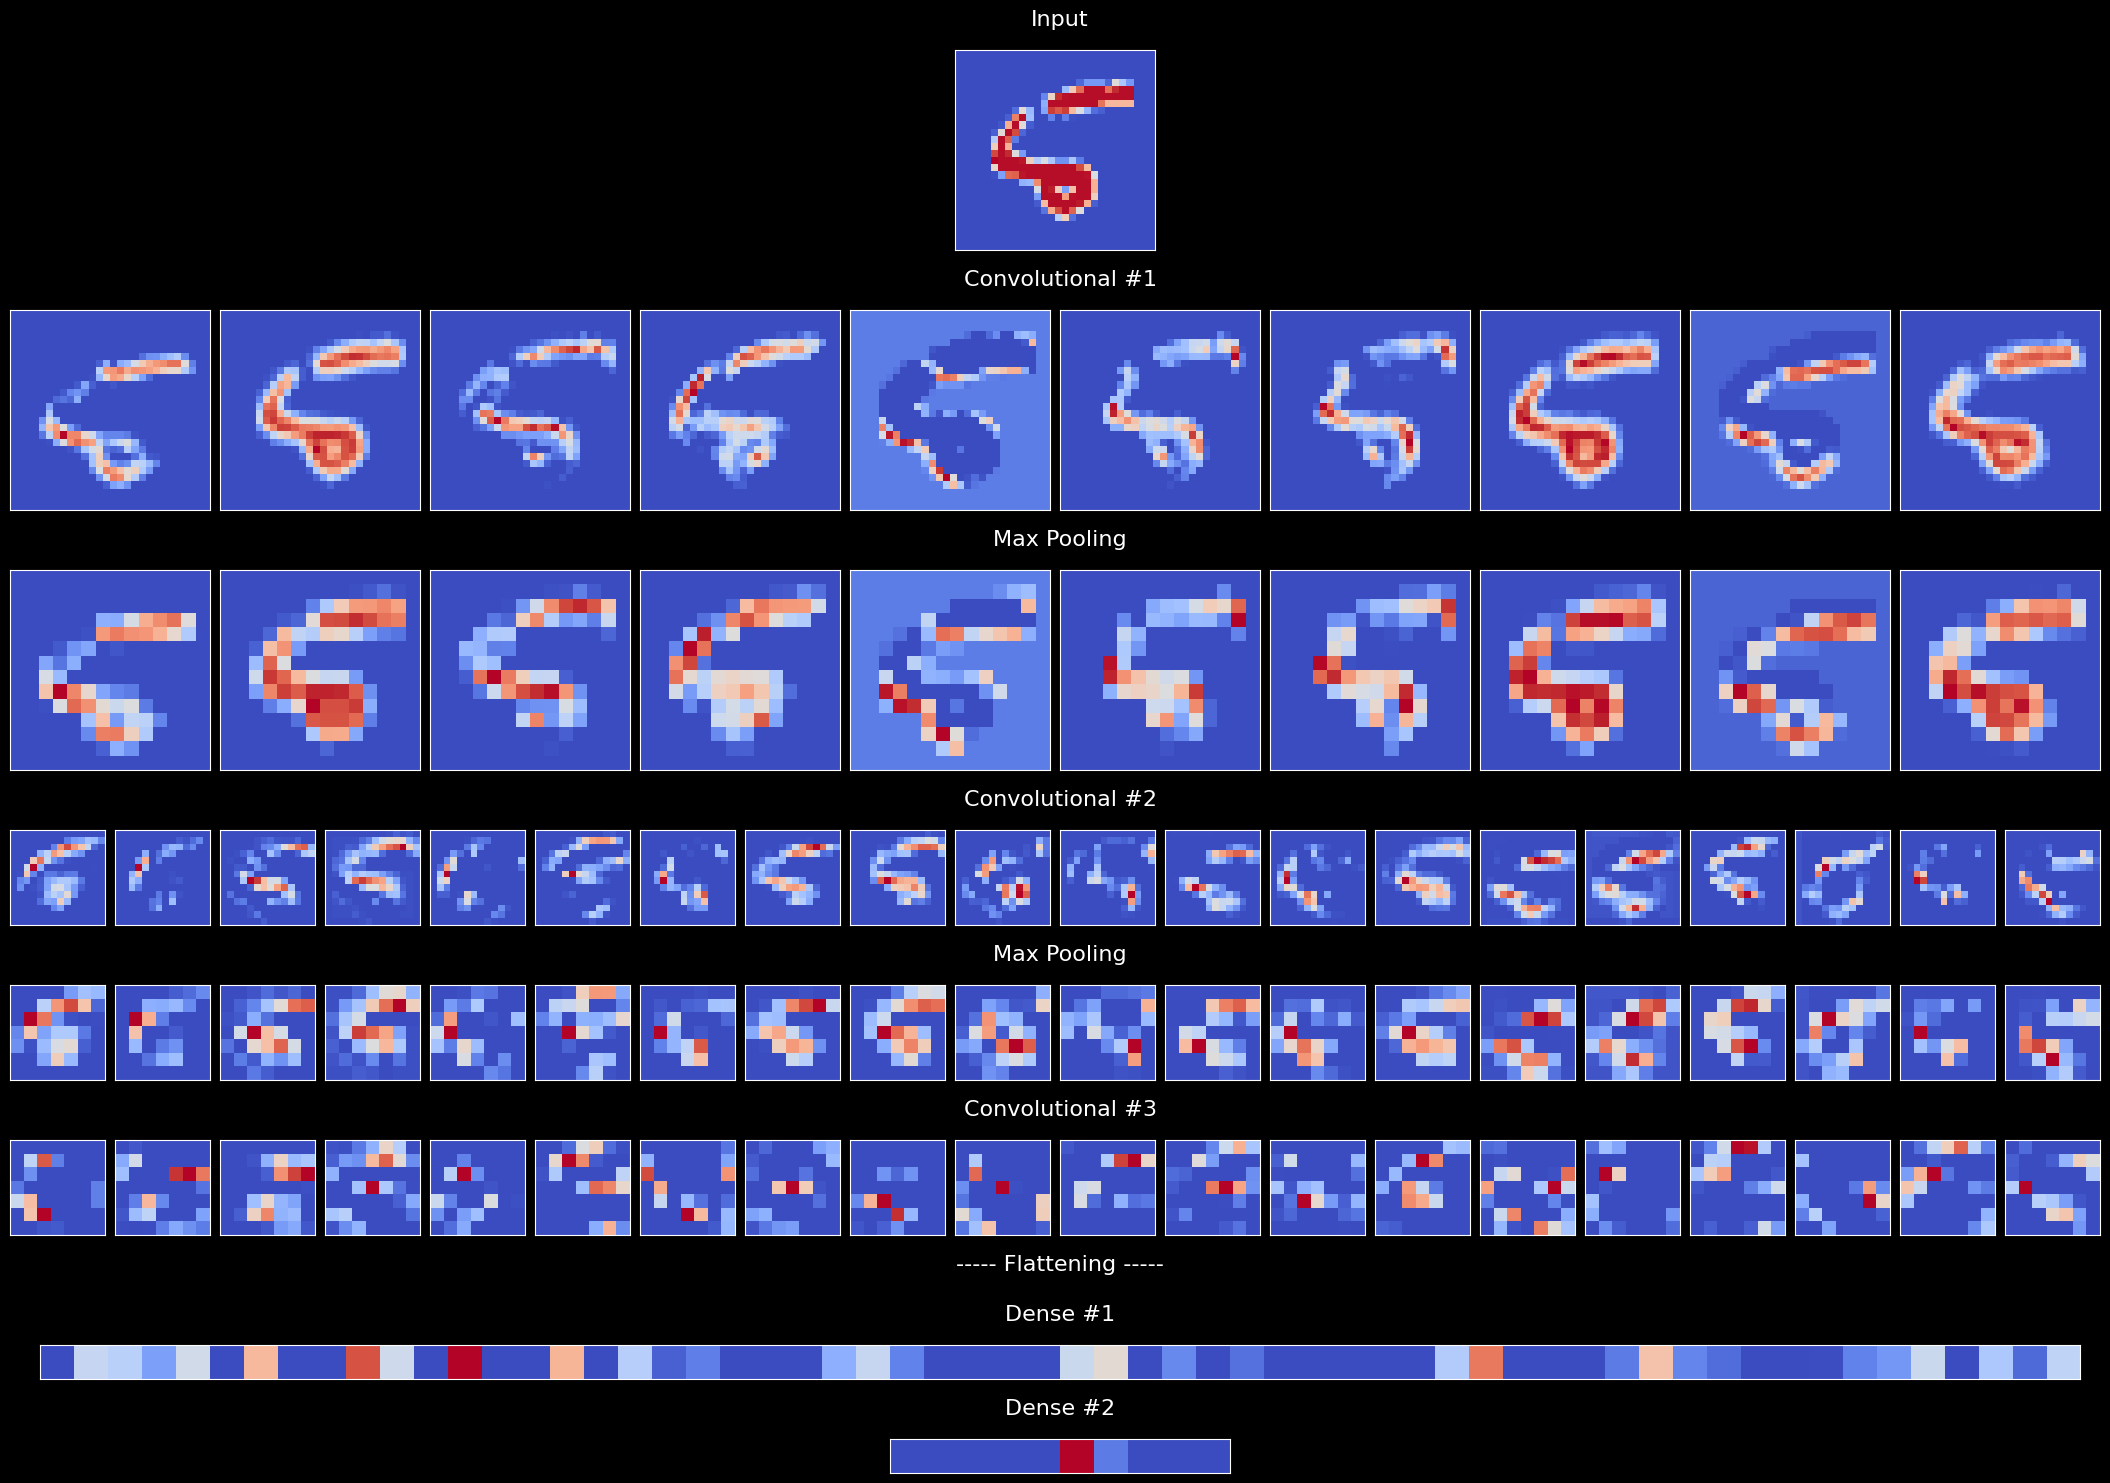

In [75]:
predict_save(8, model1)

Input draw image

In [109]:
import cv2
import numpy as np
im_gray = cv2.imread('./image_draw_28.png', cv2.IMREAD_GRAYSCALE)

"""
cv2.imshow('image', im_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

img_grey = np.invert(im_gray)
img_grey = np.expand_dims(img_grey, axis = -1)
re_im = cv2.resize(img_grey, (28,28))

re_im = re_im  / 255
dim_img = np.expand_dims(re_im, axis = -1)


(28, 51)


In [ ]:
def predict_save_image(image, model, filename=None):
    layer_activations = [layer.output for layer in model.layers]
    model_activations = models.Model(inputs=model.input, outputs=layer_activations)
    activations = model_activations.predict(image)
    print("activation[-1] : ", activations[-1])
    print("activation[-1] max : ", np.argmax(activations[-1]))
    fig = plt.figure(figsize=(10, 10))
    cmap = "coolwarm"
    last_height = 0
    for layer_num, layer in enumerate(layer_activations):
        if layer.shape.rank == 2 and layer.shape[1] < 512: # Dense layers
            width, height = 7.2, 0.034
            x0, y0 = (10 - width)/2, -height - last_height

            ax = fig.add_axes([x0, y0, width, height])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.imshow([activations[layer_num][0,:]], cmap=cmap)
        elif layer.shape.rank == 4: # Convolutional layers
            for i in range(layer.shape[-1]):
                if layer.shape[3] >= 12:
                    width, height = 0.095, 0.095
                else:
                    width, height = 0.2, 0.2
                x0 = i * (width + 0.01) + (10 - layer[1].shape[2] * (width + 0.01)) / 2
                y0 = - height - last_height

                ax = fig.add_axes([x0, y0, width, height])
                ax.set_yticks([])
                ax.set_xticks([])
                ax.imshow(activations[layer_num][0,:,:,i], cmap=cmap)
        else:
            height = -0.01

        fig.text(5, - last_height + 0.03, layer_names[layer_num], fontdict={"size":16}, horizontalalignment='center', verticalalignment='center')
        last_height += 0.06 + height

    if not filename:
        plt.show()
    else:
        fig.savefig(filename, bbox_inches="tight")
    plt.clf()
    plt.close()

1/1 [==============================] - 0s 57ms/step
activation[-1] :  [[6.1273533e-07 1.1157496e-02 7.4865056e-05 6.9807961e-06 2.8779068e-06
  8.9661654e-07 1.4227026e-06 9.8860347e-01 3.0741263e-05 1.2065249e-04]]
activation[-1] max :  7


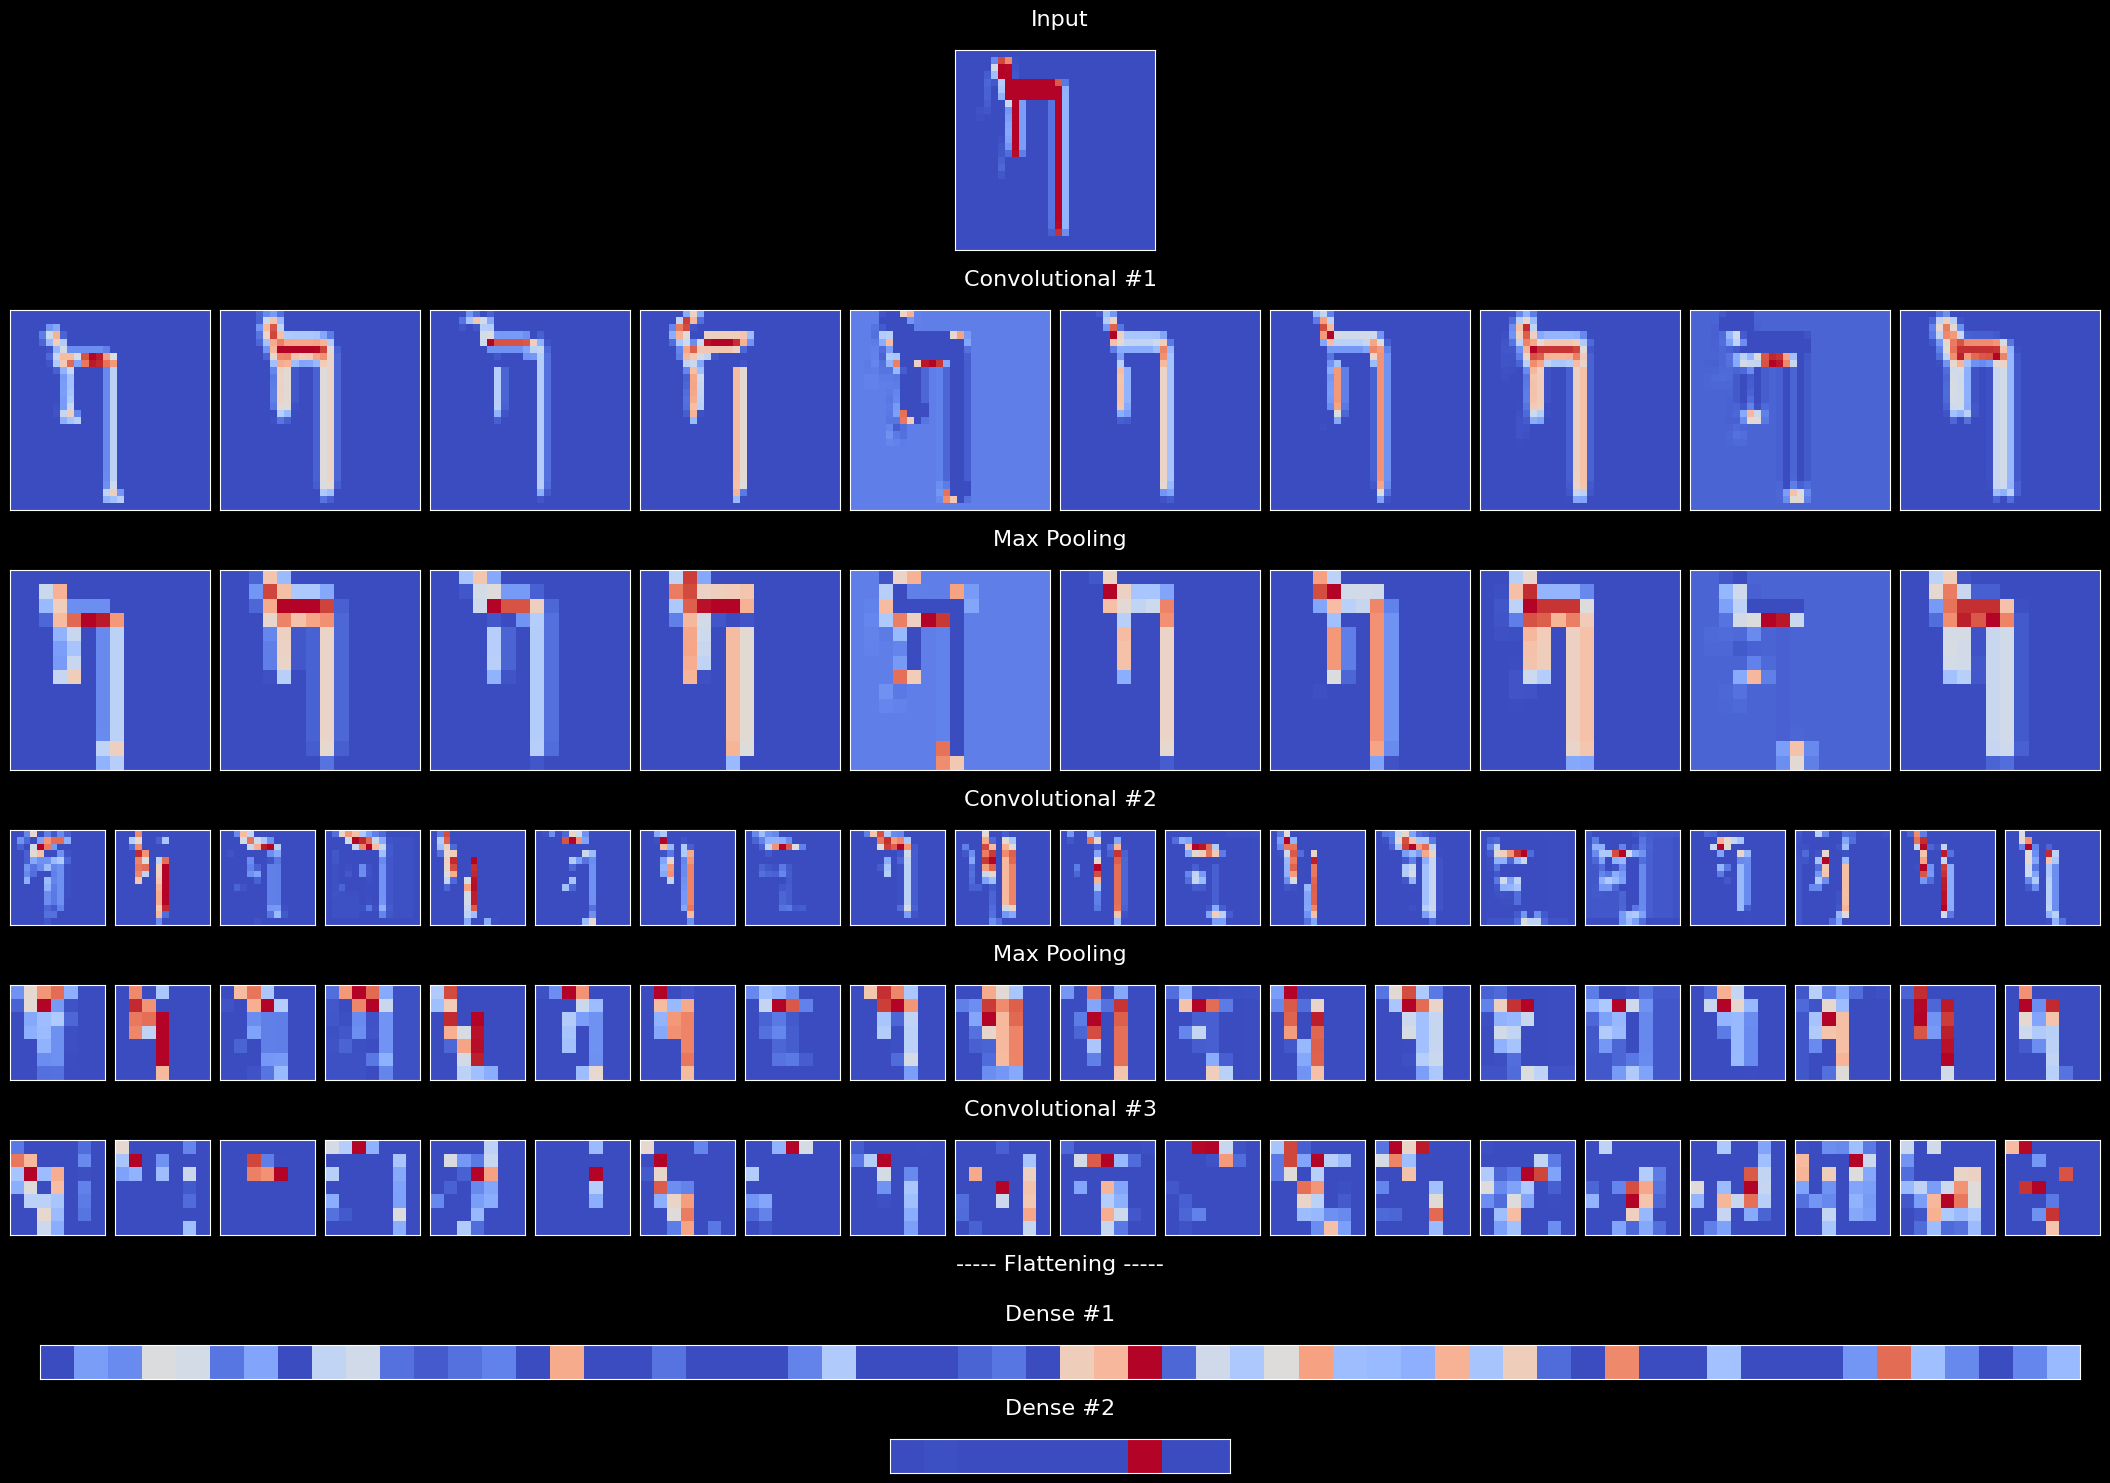

In [116]:
predict_save_image(np.array([dim_img]), model1)

In [ ]:
그림판 image 설정하는 방법
https://www.freecodecamp.org/news/how-to-resize-an-image-without-losing-quality/

html로 공부하는 방법
https://adamharley.com/nn_vis/cnn/2d.html